<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python50_tsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* github에 있는 gapminder.tsv 파일을 읽어서 데이터 프레임을 생성.
* 데이터 프레임의 구조를 확인: shape, dtypes, columns, index, value_counts(), describe(), ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file_path = 'https://raw.githubusercontent.com/JakeOh/202007_itw_bd18/master/lab_python/gapminder.tsv'
gapminder = pd.read_csv(file_path, sep='\t')

In [3]:
# head
gapminder.iloc[:5]  # iloc[], loc[]: 데이터 프레임의 row 선택

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# tail
gapminder.iloc[-5:]

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [5]:
# (row, column)
gapminder.shape

(1704, 6)

In [6]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [7]:
gapminder.index

RangeIndex(start=0, stop=1704, step=1)

In [8]:
gapminder.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [9]:
# data_frame['column_name']: 데이터 프레임에서 column을 선택.
gapminder['country'].value_counts()

Denmark        12
Chad           12
Sweden         12
Morocco        12
Lebanon        12
               ..
Uganda         12
Brazil         12
Bolivia        12
Bangladesh     12
El Salvador    12
Name: country, Length: 142, dtype: int64

In [10]:
gapminder['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [11]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [12]:
# 데이터 프레임에서 여러개의 컬럼들을 선택.
# SQL: select country, year, gdpPercap from gapminder;
# country, year, gdpPercap 선택
gapminder[['country', 'year', 'gdpPercap']]

,country,year,gdpPercap
0,Afghanistan,1952,779.445314
1,Afghanistan,1957,820.853030
2,Afghanistan,1962,853.100710
3,Afghanistan,1967,836.197138
4,Afghanistan,1972,739.981106
...,...,...,...
1699,Zimbabwe,1987,706.157306
1700,Zimbabwe,1992,693.420786
1701,Zimbabwe,1997,792.449960
1702,Zimbabwe,2002,672.038623


pandas.DataFrame의 통계 함수들

In [19]:
# pandas.Series.method()
print('평균:', gapminder['gdpPercap'].mean())
print('표준편차:', gapminder['gdpPercap'].std())
print('최솟값:', gapminder['gdpPercap'].min())
print('최댓값:', gapminder['gdpPercap'].max())
print('중앙값:', gapminder['gdpPercap'].median())

평균: 7215.327081212142
표준편차: 9857.454542541445
최솟값: 241.16587650000002
최댓값: 113523.1329
중앙값: 3531.8469885000004


In [21]:
# pandas.DataFrame.method()
# gapminder.mean()
gapminder.mean(axis=0)  # row index가 증가하는 방향으로, 각 컬럼(변수) 마다 통계 처리 - 기본값

year         1.979500e+03
lifeExp      5.947444e+01
pop          2.960121e+07
gdpPercap    7.215327e+03
dtype: float64

In [22]:
gapminder.mean(axis=1)  # column index가 증가하는 방향으로, 각 row마다 통계 처리

0       2.107023e+06
1       2.310936e+06
2       2.567483e+06
3       2.885201e+06
4       3.270552e+06
            ...     
1699    2.304793e+06
1700    2.676771e+06
1701    2.851946e+06
1702    2.982319e+06
1703    3.078416e+06
Length: 1704, dtype: float64

In [24]:
import numpy as np

np.argmax(gapminder['gdpPercap'])  # gdpPercap 컬럼의 최댓값이 있는 인덱스

853

In [26]:
# pandas.Series.argmax(): Series의 최댓값이 있는 인덱스 위치(정수).
gapminder['gdpPercap'].argmax()

853

In [27]:
gapminder.iloc[853]

country      Kuwait
continent      Asia
year           1957
lifeExp      58.033
pop          212846
gdpPercap    113523
Name: 853, dtype: object

In [45]:
# pandas.Series.idxmax(): Series의 최댓값의 인덱스.
gapminder['gdpPercap'].idxmax()

853

In [46]:
gapminder.loc[853]

country      Kuwait
continent      Asia
year           1957
lifeExp      58.033
pop          212846
gdpPercap    113523
Name: 853, dtype: object

In [53]:
s = pd.Series(data=[1, 3, 5, 2, 4], index=['a', 'b', 'c', 'd', 'e'])
print(s)
print('최댓값:', s.max())
print('argmax:', s.argmax(), s.iloc[s.argmax()])
print('idxmax:', s.idxmax(), s.loc[s.idxmax()])

a    1
b    3
c    5
d    2
e    4
dtype: int64
최댓값: 5
argmax: 2 5
idxmax: c 5


In [55]:
# gapminder 데이터 프레임에서 lifeExp의 최솟값, 최댓값
min_lifeExp = gapminder['lifeExp'].min()
max_lifeExp = gapminder['lifeExp'].max()
print(min_lifeExp, max_lifeExp)

idx_min_life = gapminder['lifeExp'].argmin()
idx_max_life = gapminder['lifeExp'].argmax()
print(idx_min_life, idx_max_life)

23.599 82.603
1292 803


In [57]:
# gapminder 데이터 프레임에서 lifeExp의 최솟값, 최댓값을 갖는 row를 출력
gapminder.iloc[[idx_min_life, idx_max_life]]

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
803,Japan,Asia,2007,82.603,127467972,31656.068060


In [58]:
# boolean indexing: data_frame[조건식]: 조건식이 True가 되는 row들을 선택.
gapminder[(gapminder['lifeExp'] == min_lifeExp) | 
          (gapminder['lifeExp'] == max_lifeExp)]

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.068060
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


In [62]:
s = pd.Series([1, 1, 2, 3, 4, 5])
print(s.argmin())
print(s.iloc[s.argmin()])
print(s[s == s.min()])

0
1
0    1
1    1
dtype: int64


In [66]:
# gapminder 데이터 프레임에 대륙은 모두 몇 개?
gapminder['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [67]:
len(gapminder['continent'].value_counts())

5

In [68]:
gapminder['continent'].value_counts().index

Index(['Africa', 'Asia', 'Europe', 'Americas', 'Oceania'], dtype='object')

In [69]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [70]:
len(gapminder['continent'].unique())

5

In [72]:
# 나라 이름은 모두 몇개?
len(gapminder['country'].unique())

142

In [73]:
gapminder['country'].nunique()  # nunique(): number of unique values

142

In [76]:
# 중복되지 않는 연도를 모두 출력
years = gapminder['year'].unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [93]:
# 연도(year)별 lifeExp의 평균을 출력.
mean_lifeExp = []  # 연도별 lifeExp의 평균을 저장하기 위한 empty list
for year in years:
    subset = gapminder[gapminder['year'] == year]  # 해당 연도 부분집합 찾음.
    # print(year, ':', subset['lifeExp'].mean())
    mean = subset['lifeExp'].mean()  # 부분집합에서 lifeExp 컬럼의 평균을 계산.
    mean_lifeExp.append(mean)  # 계산된 평균을 리스트에 추가

mean_lifeExp

[49.05761971830987,
 51.50740112676054,
 53.60924901408449,
 55.67828957746479,
 57.64738647887325,
 59.57015746478873,
 61.53319718309858,
 63.21261267605636,
 64.16033802816901,
 65.01467605633805,
 65.69492253521126,
 67.00742253521126]

In [94]:
mean_lifeExp_s = pd.Series(data=mean_lifeExp, index=years)
mean_lifeExp_s

1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
dtype: float64

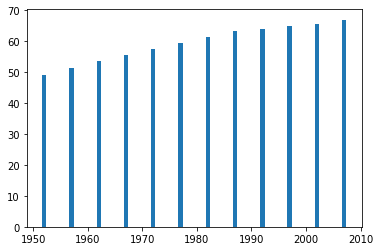

In [95]:
# 연도(year)별 lifeExp의 평균을 그래프로 표현.
plt.bar(x=mean_lifeExp_s.index, height=mean_lifeExp_s.values)
plt.show()

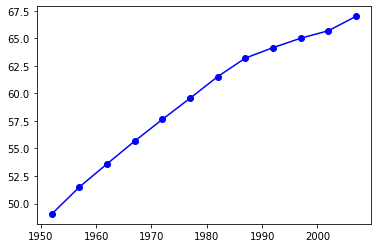

In [97]:
plt.plot(mean_lifeExp_s.index, mean_lifeExp_s.values, 'bo-')
plt.show()

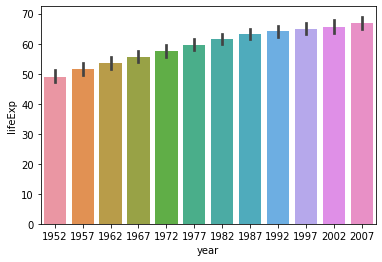

In [99]:
sns.barplot(x='year', y='lifeExp', data=gapminder)
plt.show()

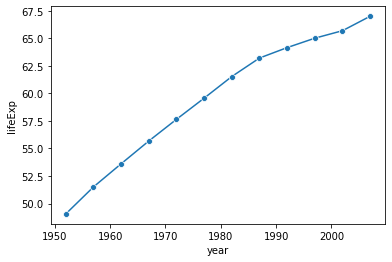

In [102]:
sns.lineplot(x='year', y='lifeExp', data=gapminder, err_style=None, marker='o')
plt.show()

In [104]:
# 연도별 gdpPercap의 평균 출력, 그래프
mean_gdp = [gapminder[gapminder['year'] == year]['gdpPercap'].mean()
            for year in years]
mean_gdp_s = pd.Series(data=mean_gdp, index=years)
mean_gdp_s

1952     3725.276046
1957     4299.408345
1962     4725.812342
1967     5483.653047
1972     6770.082815
1977     7313.166421
1982     7518.901673
1987     7900.920218
1992     8158.608521
1997     9090.175363
2002     9917.848365
2007    11680.071820
dtype: float64

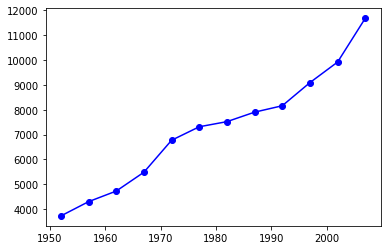

In [105]:
plt.plot(mean_gdp_s.index, mean_gdp_s.values,
         color='blue', marker='o', linestyle='-')  # 'bo-'
plt.show()

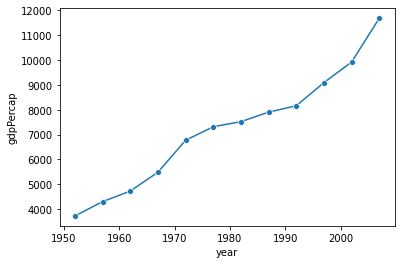

In [106]:
sns.lineplot(x='year', y='gdpPercap', data=gapminder, 
             err_style=None, marker='o')
plt.show()

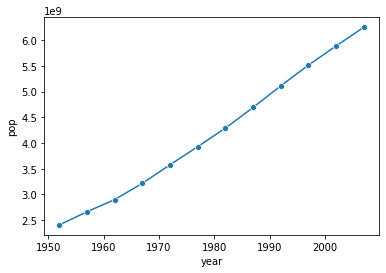

In [109]:
# 연도(year)별 전세계 인구 출력, 선그래프.
sns.lineplot(x='year', y='pop', data=gapminder, estimator='sum',
             err_style=None, marker='o')
plt.show()

In [111]:
total_pop = [gapminder[gapminder['year'] == year]['pop'].sum() 
             for year in years]
total_pop_s = pd.Series(data=total_pop, index=years)
total_pop_s

1952    2406957150
1957    2664404580
1962    2899782974
1967    3217478384
1972    3576977158
1977    3930045807
1982    4289436840
1987    4691477418
1992    5110710260
1997    5515204472
2002    5886977579
2007    6251013179
dtype: int64

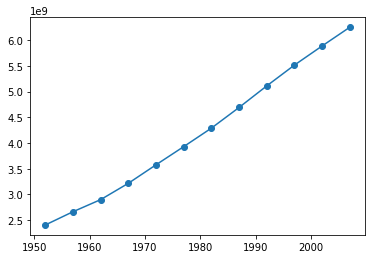

In [113]:
plt.plot(total_pop_s, marker='o')
plt.show()

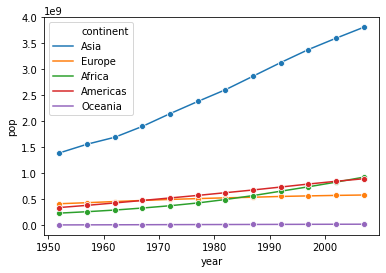

In [114]:
# 연도별 인구 선 그래프를 대륙별로 5개의 선으로 표현.
sns.lineplot(x='year', y='pop', hue='continent', data=gapminder,
             estimator='sum', err_style=None, marker='o')
plt.show()

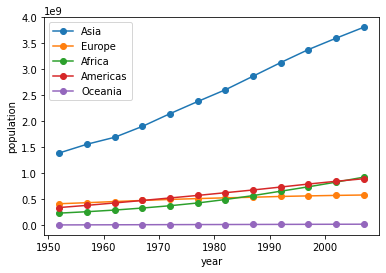

In [124]:
continents = gapminder['continent'].unique()
years = gapminder['year'].unique()

for continent in continents:
    # 대륙별 부분 집합
    gapminder_by_continent = gapminder[gapminder['continent'] == continent]
    total_pop = [gapminder_by_continent[gapminder_by_continent['year'] == year]['pop'].sum()
                 for year in years]
    total_pop_s = pd.Series(data=total_pop, index=years)
    plt.plot(total_pop_s, marker='o', label=continent)

plt.legend()
plt.xlabel('year')
plt.ylabel('population')
plt.show()

In [129]:
# 대한민국(Korea, Rep.) 데이터(레코드)를 출력
gapminder[gapminder['country'] == 'Korea, Rep.']

,country,continent,year,lifeExp,pop,gdpPercap
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960


In [131]:
gapminder[gapminder['country'].str.upper() == 'KOREA, REP.']

,country,continent,year,lifeExp,pop,gdpPercap
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960


In [132]:
gapminder[gapminder['country'].str.contains('Korea')]

,country,continent,year,lifeExp,pop,gdpPercap
828,"Korea, Dem. Rep.",Asia,1952,50.056,8865488,1088.277758
829,"Korea, Dem. Rep.",Asia,1957,54.081,9411381,1571.134655
830,"Korea, Dem. Rep.",Asia,1962,56.656,10917494,1621.693598
831,"Korea, Dem. Rep.",Asia,1967,59.942,12617009,2143.540609
832,"Korea, Dem. Rep.",Asia,1972,63.983,14781241,3701.621503
833,"Korea, Dem. Rep.",Asia,1977,67.159,16325320,4106.301249
834,"Korea, Dem. Rep.",Asia,1982,69.100,17647518,4106.525293
835,"Korea, Dem. Rep.",Asia,1987,70.647,19067554,4106.492315
836,"Korea, Dem. Rep.",Asia,1992,69.978,20711375,3726.063507
837,"Korea, Dem. Rep.",Asia,1997,67.727,21585105,1690.756814


In [133]:
# 대한민국의 연도, 인구, 1인당 GDP, 기대수명을 출력
gapminder[gapminder['country'] == 'Korea, Rep.'][['year', 'pop', 'gdpPercap', 'lifeExp']]

,year,pop,gdpPercap,lifeExp
840,1952,20947571,1030.592226,47.453
841,1957,22611552,1487.593537,52.681
842,1962,26420307,1536.344387,55.292
843,1967,30131000,2029.228142,57.716
844,1972,33505000,3030.876650,62.612
845,1977,36436000,4657.221020,64.766
846,1982,39326000,5622.942464,67.123
847,1987,41622000,8533.088805,69.810
848,1992,43805450,12104.278720,72.244
849,1997,46173816,15993.527960,74.647
